In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64
no of unique values 53
*****************
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64
no of unique values 169
*****************
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1


### Checking for null values

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

### Observations :-

    - No missing values in the dataset.
    - 11 numerical columns and 3 object columns
    - Though features are not normaly distributed, are close to normality
    - Some of the features have minimum (requires re-check)
    - Each feature has different scale range
    - some of these columns only informing about bags which not relevent for prediction(better to drop them)
    - unnamed: 0 is also giving info about index so dropping that too.

## Preparing the data

In [8]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
df.drop(["Unnamed: 0","Total Bags","Small Bags","Large Bags","XLarge Bags"],axis=1,inplace=True)

We will separate day amd month from date column and delete the date column, column for year is already present.

In [10]:
day=[]
month=[]
for i in df["Date"]:
    day.append(i.split("-")[2])
    month.append(i.split("-")[1]) 

In [11]:
df["Month"]=month
df["Day"]=day

from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770']]=power_transform(df[['Total Volume','4046','4225','4770']],method='yeo-johnson')

In [12]:
df.drop("Date",axis=1,inplace=True)

####  converting objects into integer datatype



In [13]:
df[['Day','Month']] = df[['Day','Month']].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   type          18249 non-null  object 
 6   year          18249 non-null  int64  
 7   region        18249 non-null  object 
 8   Month         18249 non-null  int32  
 9   Day           18249 non-null  int32  
dtypes: float64(5), int32(2), int64(1), object(2)
memory usage: 1.3+ MB


## EDA

<AxesSubplot:>

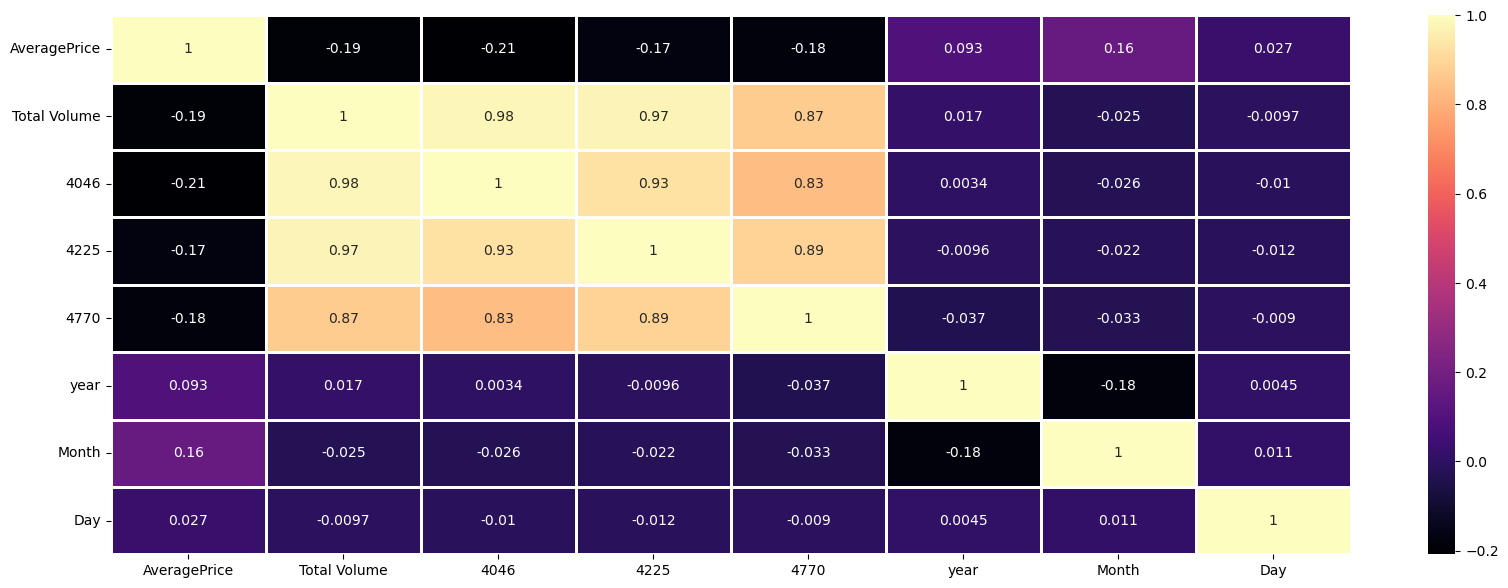

In [15]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='white',cmap='magma')

### Observation:-

  - we don't see any column fairely correlated with Average price
  - Some of them are negatively correlated with data
  - columns highly correlated with each other-
        - 4046 - Total number of avocados with PLU 4046 sold
        - 4225 - Total number of avocados with PLU 4225 sold
        - 4770 - Total number of avocados with PLU 4770 sold
        - Total Volume - Total number of avacados sold

<AxesSubplot:xlabel='Day', ylabel='Count'>

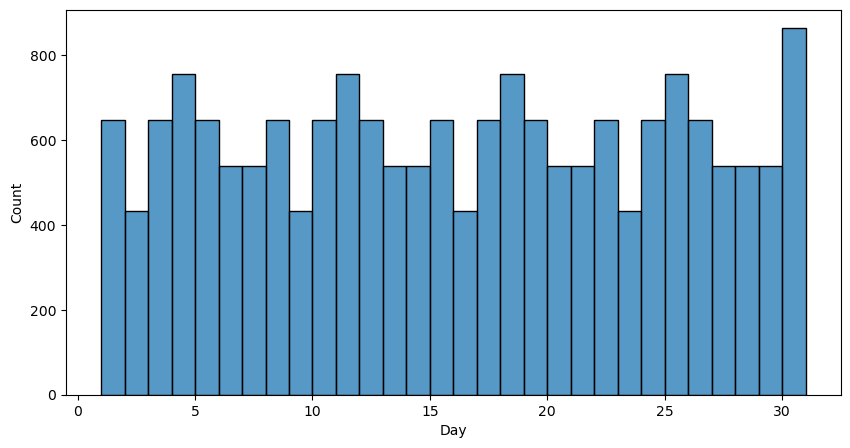

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['Day'], bins=30)

### Observations :-
    - There is hike in sale after every 6 days
    - Highest sale is on last day of the month.
    - Avergae quantity sold daily isbetween 400-600.

<AxesSubplot:xlabel='Month', ylabel='count'>

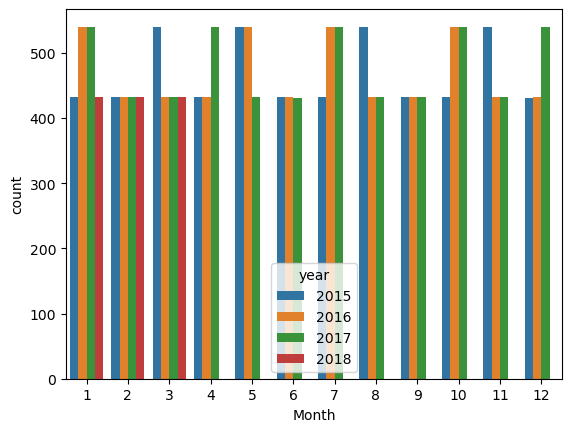

In [17]:
sns.countplot(x='Month',data=df,hue="year")

In [18]:
# Creating dataset for classification model
dfc=df
dfc

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico,1,14


## converting categorical to numerical

In [19]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   type          18249 non-null  int32  
 6   year          18249 non-null  int64  
 7   region        18249 non-null  int32  
 8   Month         18249 non-null  int32  
 9   Day           18249 non-null  int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 1.1 MB


## Skewness handling

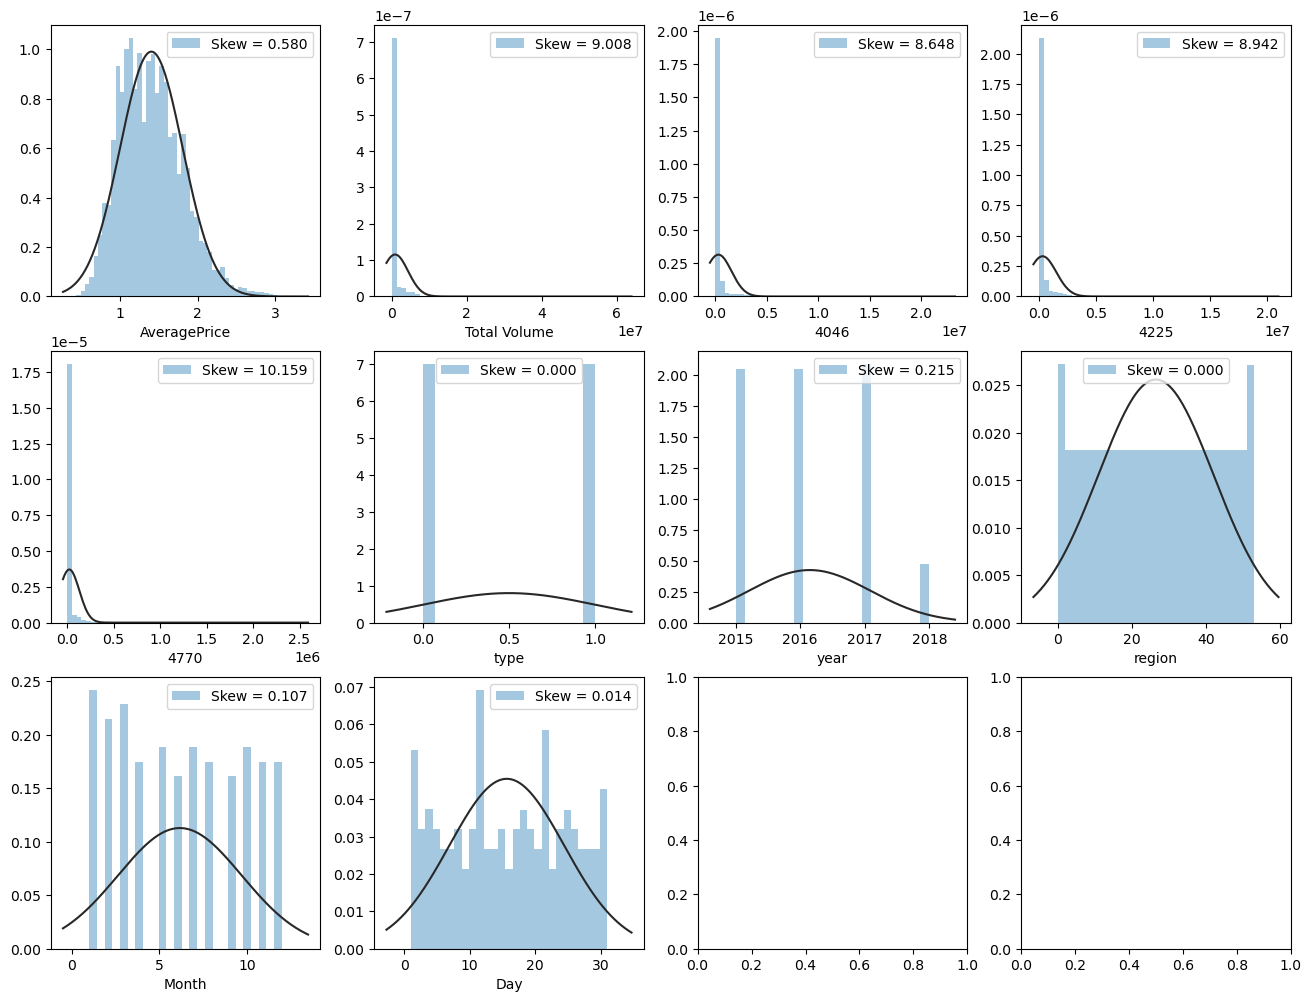

In [21]:
fig,ax = plt.subplots(3,4, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df.columns:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

In [22]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [23]:
from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770']]=power_transform(df[['Total Volume','4046','4225','4770']],method='yeo-johnson')

In [24]:
df.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

## Outliers handling

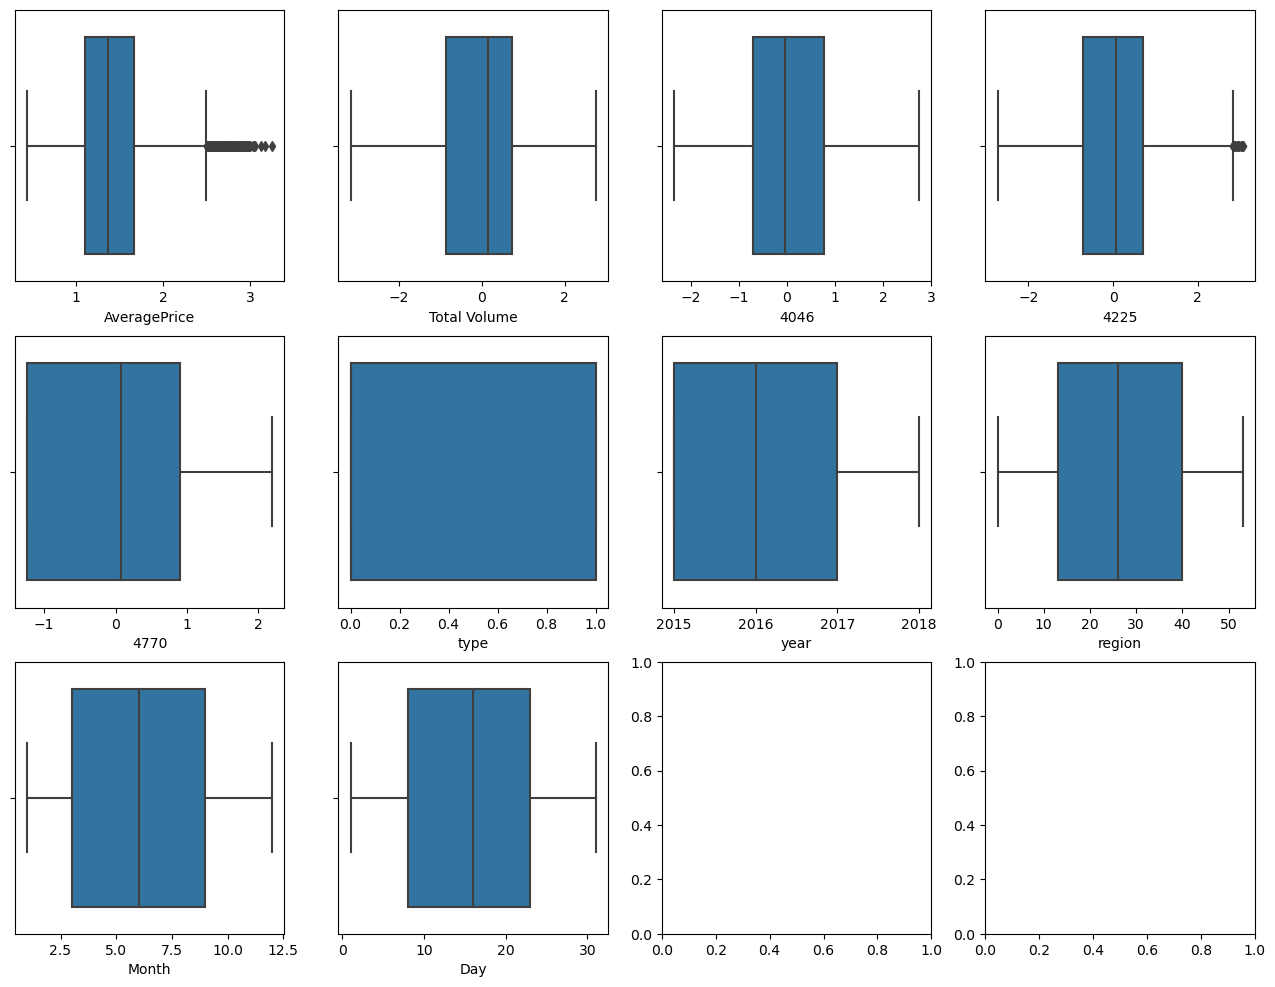

In [25]:
fig,ax = plt.subplots(3,4, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df.columns:
    skew = df[col].skew()
    sns.boxplot(df[col], ax = ax[i])  
    i += 1
plt.show()

In [26]:
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]
dfn

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,0,2015,0,12,27
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,0,2015,0,12,20
2,0.93,0.179327,-0.731947,0.579503,-0.007072,0,2015,0,12,13
3,1.08,0.003876,-0.634200,0.415100,-0.148322,0,2015,0,12,6
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,1,2018,53,2,4
18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,1,2018,53,1,28
18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,1,2018,53,1,21
18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,1,2018,53,1,14


In [27]:
df

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,0,2015,0,12,27
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,0,2015,0,12,20
2,0.93,0.179327,-0.731947,0.579503,-0.007072,0,2015,0,12,13
3,1.08,0.003876,-0.634200,0.415100,-0.148322,0,2015,0,12,6
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,1,2018,53,2,4
18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,1,2018,53,1,28
18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,1,2018,53,1,21
18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,1,2018,53,1,14


18249-18113=136 data entries removed which is only 0.07% of the dataset.

# To find avergae price of avocado
    - we will use regressor model

## Scaling of Independent features

In [28]:
X=dfn.iloc[:,1:-1]
y=dfn.iloc[:,0]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

To find best random state

In [29]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.5196639990672152
At random state 0, The test accuracy is :-0.5137448218156995


At random state 1, The training accuracy is :-0.5128873672515246
At random state 1, The test accuracy is :-0.5269743844160291


At random state 2, The training accuracy is :-0.5217006725473479
At random state 2, The test accuracy is :-0.5101493949255786


At random state 3, The training accuracy is :-0.5151206237339967
At random state 3, The test accuracy is :-0.5233034493812099


At random state 4, The training accuracy is :-0.5140223818934343
At random state 4, The test accuracy is :-0.5256613675159008


At random state 5, The training accuracy is :-0.5138547410559609
At random state 5, The test accuracy is :-0.5258595282498395


At random state 6, The training accuracy is :-0.5180776344024128
At random state 6, The test accuracy is :-0.5172368530333433


At random state 7, The training accuracy is :-0.5149441478299484
At random state 7, The test accuracy is

94 is the best random state

In [30]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=94)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(12135, 8) (12135,)
(5978, 8) (5978,)


## Model Building

In [31]:
lr=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [32]:
model=[lr,svr,dtr,rfr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    print("==============================================\n\n\n====================================================")

Scores for LinearRegression() are
Mean Absolute Error: 0.2115154771408671
Mean Squared Error: 0.07251855367633148
Root Mean Squared Error: 0.26929269146475454
R squared score:  0.5155047237773241
Cross Validation Score is : [0.51942669 0.50803474 0.51745981 0.51868759 0.52790016]
Mean Score : 0.5183017973482571
Difference : 0.002797073570932951


Scores for SVR() are
Mean Absolute Error: 0.14703484910016787
Mean Squared Error: 0.03944724637314787
Root Mean Squared Error: 0.1986133086506236
R squared score:  0.7364535893382003
Cross Validation Score is : [0.72445046 0.71418485 0.70872433 0.73221802 0.74380567]
Mean Score : 0.7246766642311077
Difference : -0.011776925107092606


Scores for DecisionTreeRegressor() are
Mean Absolute Error: 0.12507862161257946
Mean Squared Error: 0.03834754098360656
Root Mean Squared Error: 0.19582528177844288
R squared score:  0.7438007031381721
Cross Validation Score is : [0.73783565 0.68627643 0.69779778 0.69786236 0.71184381]
Mean Score : 0.706323205010

RandomForestRegressor has given the best scores, so we will continue with it.

## HYPER PERAMETER TUNING

In [33]:
param ={
       'n_estimators':[100,200],
      'criterion':['friedman_mse','poisson'],
     'min_samples_split':[2,3],
    'min_samples_leaf':[1,2],
}

In [34]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

RF_grid.best_params_

Fitting 4 folds for each of 16 candidates, totalling 64 fits


{'criterion': 'friedman_mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

### Preparing model with best parameters.

In [35]:
rfr_final = sklearn.ensemble.RandomForestRegressor(n_estimators=100,criterion='friedman_mse',min_samples_split=2,min_samples_leaf=1)

rfr_final.fit(train_x,train_y)
rfr_final.score(train_x,train_y)
pred_final=rfr_final.predict(test_x)

print('R squared score: ', r2_score(pred_final,test_y))
score=cross_val_score(rfr_final,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())
print("Difference :",score.mean()-r2_score(pred_final,test_y))

R squared score:  0.8434260452242686
Cross Validation Score is : [0.87101943 0.85263964 0.85527793 0.8621368  0.87204549]
Mean Score : 0.8626238596801782
Difference : 0.019197814455909623


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

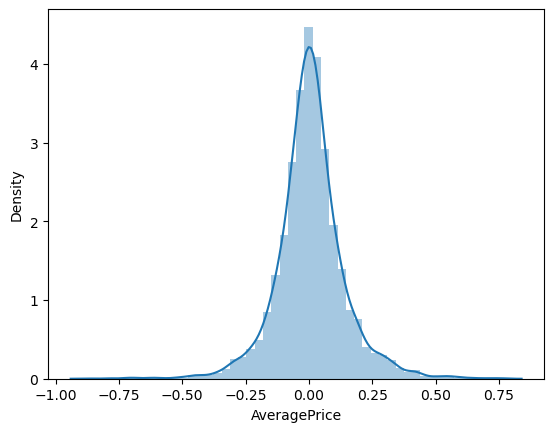

In [36]:
sns.distplot(pred_final-test_y)

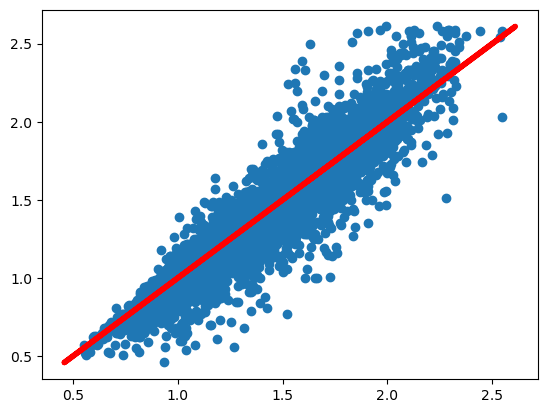

In [37]:
plt.scatter(pred_final,test_y)
plt.plot(test_y,test_y,linewidth=4,color='Red')

## Saving The Model

In [38]:
import joblib
joblib.dump(rfr_final,'Avocado_price_rfr.obj')

['Avocado_price_rfr.obj']

# To find region of avocado
    - We will use classifier model

In [39]:
from sklearn.preprocessing import power_transform
dfc[['Total Volume','4046','4225','4770']]=power_transform(dfc[['Total Volume','4046','4225','4770']],method='yeo-johnson')

In [40]:
dfc

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,1.33,-0.094167,-0.660667,0.300522,-0.246071,0,2015,0,12,27
1,1.35,-0.163138,-0.778196,0.224457,-0.199829,0,2015,0,12,20
2,0.93,0.171997,-0.733558,0.574906,-0.005791,0,2015,0,12,13
3,1.08,-0.003767,-0.636385,0.409041,-0.147079,0,2015,0,12,6
4,1.28,-0.194924,-0.687187,0.217585,-0.136671,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.678228,-0.470376,-0.920043,-1.239006,1,2018,53,2,4
18245,1.71,-0.770128,-0.622146,-0.669147,-1.239006,1,2018,53,1,28
18246,1.87,-0.774035,-0.622095,-0.775016,0.402587,1,2018,53,1,21
18247,1.93,-0.701459,-0.552907,-0.713806,0.402287,1,2018,53,1,14


In [41]:
z=np.abs(zscore(dfc.drop(["region","type"], axis=1)))
dfcn=dfc[(z<3).all(axis=1)]
dfcn

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,1.33,-0.094167,-0.660667,0.300522,-0.246071,0,2015,0,12,27
1,1.35,-0.163138,-0.778196,0.224457,-0.199829,0,2015,0,12,20
2,0.93,0.171997,-0.733558,0.574906,-0.005791,0,2015,0,12,13
3,1.08,-0.003767,-0.636385,0.409041,-0.147079,0,2015,0,12,6
4,1.28,-0.194924,-0.687187,0.217585,-0.136671,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.678228,-0.470376,-0.920043,-1.239006,1,2018,53,2,4
18245,1.71,-0.770128,-0.622146,-0.669147,-1.239006,1,2018,53,1,28
18246,1.87,-0.774035,-0.622095,-0.775016,0.402587,1,2018,53,1,21
18247,1.93,-0.701459,-0.552907,-0.713806,0.402287,1,2018,53,1,14


## converting categorical to numerical

In [42]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
dfcn['type']=le.fit_transform(dfcn['type'])

## Scaling of independent features

In [46]:
Xc=dfcn.drop("region",axis=1)
yc=dfcn["region"]
st=StandardScaler()
xfc=st.fit_transform(Xc)
xc=pd.DataFrame(data=xfc, columns=Xc.columns)

### Preparing data for modelling

In [47]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(xc,yc,test_size=0.25,random_state=94)

In [48]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(13584, 9) (13584,)
(4528, 9) (4528,)


### Training and testing of data


In [49]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.4107773851590106 
 [[42  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  4]
 ...
 [ 0  0  0 ... 78  1  0]
 [ 0  0  0 ...  0 59  0]
 [ 0 13  0 ...  0  0  7]] 
               precision    recall  f1-score   support

           0       0.53      0.51      0.52        83
           1       0.23      0.34      0.28        86
           2       0.30      0.26      0.28        98
           3       0.40      0.45      0.42        85
           4       0.40      0.31      0.35        91
           5       0.61      0.58      0.59        79
           6       0.55      0.76      0.64        74
           7       0.39      0.79      0.52        73
           8       0.39      0.52      0.45        84
           9       0.37      0.66      0.47        77
          10       0.41      0.38      0.40        86
          11       0.40      0.40      0.40        89
          12       0.23      0.21      0.22        84
          13     

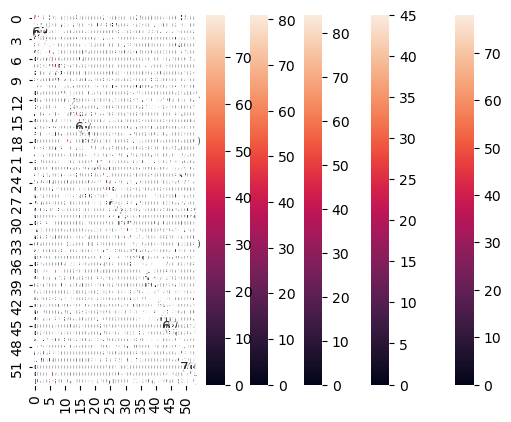

In [50]:
model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

#### accuracy score for  DecisionTreeClassifier() is :  0.7310664605873262, which is best

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(train_x,train_y)
print(rfc.score(train_x,train_y))
rfc_PRED=rfc.predict(test_x)

print("accuracy score for is : ",accuracy_score(test_y,rfc_PRED),"\n",confusion_matrix(test_y,rfc_PRED),"\n",classification_report(test_y,rfc_PRED),"\n")
score=cross_val_score(rfc,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

#### As accuracy score  is :  0.8549348642084346 , we will proced with random forest classifier


### Hyperparameter tuning

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
    
dict2={"random_state":[50,100,200],"criterion":['gini', 'entropy',],"min_samples_split":[2,3]}
gv=GridSearchCV(rf,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'entropy', 'min_samples_split': 2, 'random_state': 50}

In [52]:
rf1=RandomForestClassifier(criterion='entropy', min_samples_split= 2, random_state= 50)
rf1.fit(train_x,train_y)
prf=rf1.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.8551236749116607
Cross Validation Score is : [0.42546927 0.41295547 0.40853883 0.40412219 0.42231222]
Mean Score : 0.41467959604150595


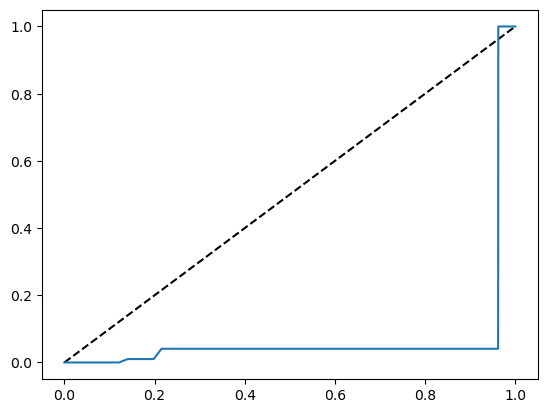

In [53]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=metrics.roc_curve(test_y,prf,pos_label=2)
#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)

In [54]:
import joblib
joblib.dump(rf1,"avocado_region_rfc.obj")

['avocado_region_rfc.obj']

In [55]:
rfr=joblib.load('avocado_region_rfc.obj')

In [56]:
result=rfr.predict(test_x)

In [57]:
print(accuracy_score(test_y,result))

0.8551236749116607
